In [1]:
import pypylon.pylon as py

In [2]:
from pypylon import pylon

In [3]:
camera_serials = [24535665, 24548223]

In [4]:
NUM_CAMERAS = 2

In [5]:
tlf = py.TlFactory.GetInstance()

In [6]:
# create a device filter for Pylon CamEmu devices
di = py.DeviceInfo()

In [7]:
di

<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7f52d3709e00> >

In [8]:
devs = tlf.EnumerateDevices([di,])

In [9]:
devs

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7f52d3709ec0> >,
 <pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x7f52d3709fb0> >)

In [10]:
devs[0].GetSerialNumber()

'24535665'

In [11]:
camera = py.InstantCamera(tlf.CreateDevice(devs[0]))

In [12]:
camera.Open()

In [13]:
# demonstrate some feature accessdi.SetSerialNumber("2134234")
new_width = camera.Width.GetValue() - camera.Width.GetInc()
if new_width >= camera.Width.GetMin():
    camera.Width.SetValue(new_width)

In [14]:
??camera.StartGrabbing

In [15]:
??camera.StartGrabbingMax

In [16]:
numberOfImagesToGrab = 5
camera.StartGrabbingMax(numberOfImagesToGrab)

In [17]:
??camera.RetrieveResult

In [18]:
camera.IsGrabbing()

True

In [23]:
??camera.RetrieveResult

In [19]:
while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print(grabResult.TimeStamp)
        print("Gray value of first pixel: ", img[0, 0])

    grabResult.Release()
camera.Close()

SizeX:  960
SizeY:  1024
6122839540383
Gray value of first pixel:  2
SizeX:  960
SizeY:  1024
6122844590841
Gray value of first pixel:  3
SizeX:  960
SizeY:  1024
6122849641299
Gray value of first pixel:  2
SizeX:  960
SizeY:  1024
6122854691757
Gray value of first pixel:  2
SizeX:  960
SizeY:  1024
6122859742215
Gray value of first pixel:  2


In [24]:
img

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 2, 3],
       [2, 2, 2, ..., 2, 3, 3],
       ...,
       [1, 1, 0, ..., 2, 2, 3],
       [1, 0, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 1]], dtype=uint8)

In [20]:
import matplotlib.pyplot as plt

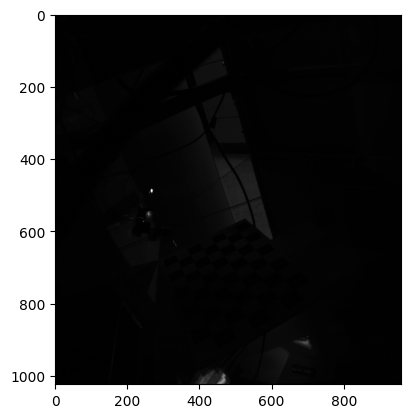

In [21]:
plt.imshow(img, cmap = plt.cm.Greys_r)

In [22]:
camera.Close()